In this project, I will be analysing reviews that were given to Amazon Products. This dataset contains around 41000 reviews of various Amazon products such as Fire tablet, Fire stick. Along with it, there is also the rating given by the user and if the user recommends this product or not. 

**Aim**: Use the textual reviews of Amazon Products to predict ratings, while experimenting various parts of textual analysis.<br>
I will be using the text column in the dataset to predict the rating given by the user, whether it is positive or negative. This is of course under the assumption that the review given by the user matches the rating given. Hopefully, the reviews here are not something like this one!<br>

<img src="images/The-Contradictory.png" alt="Great review but one star?!" title="Contradictory review" /> <br>
So, before I start, the idea is to change the *rating* from numbers to positive-negative or use the *doRecommend* flag and predict this rating using the reviews for each product.<br>

**Dataset**: https://www.kaggle.com/datafiniti/consumer-reviews-of-amazon-products/kernels <br>
So, let's start!

### Import all libraries that would be used

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import re
import string
import nltk
from wordcloud import WordCloud, STOPWORDS

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, roc_curve, auc, recall_score, precision_score, f1_score, accuracy_score

In [2]:
reviews= pd.read_csv('1429_1.csv')
reviews.columns = ['id', 'name', 'asins', 'brand', 'categories', 'keys', 'manufacturer', 'date', 'dateAdded', 'dateSeen', 'didPurchase', 'doRecommend', 'id', 'numHelpful', 'rating', 'sourceURLs', 'text', 'title', 'userCity', 'userProvince', 'username']
reviews.head()

C:\Users\saumy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3018: DtypeWarning: Columns (1,10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,name,asins,brand,categories,keys,manufacturer,date,dateAdded,dateSeen,...,doRecommend,id,numHelpful,rating,sourceURLs,text,title,userCity,userProvince,username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


Drop these columns as they would have no effect in the analysis later.

In [3]:
reviews.drop(['id', 'dateSeen', 'sourceURLs', 'userCity', 'userProvince', 'username'], axis = 1, inplace= True)

In [4]:
reviews[['rating', 'title', 'text' ]].isnull().sum()

rating    33
title      5
text       1
dtype: int64

Drop the one review without the text as it has no use in the model

In [5]:
reviews_nna= reviews[pd.notnull(reviews['text'])]
reviews_nna[['rating', 'title', 'text' ]].isnull().sum()

rating    33
title      5
text       0
dtype: int64

#### The top 5 most reviewed items in the dataset
Looks like Fire tablet is way ahead of the rest here.

In [6]:
reviews_nna['name'].value_counts().nlargest(5)

Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes Special Offers, Magenta                                       10966
Echo (White),,,\r\nEcho (White),,,                                                                            3309
Amazon Kindle Paperwhite - eBook reader - 4 GB - 6 monochrome Paperwhite - touchscreen - Wi-Fi - black,,,     3176
All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta                       2814
Amazon Fire Tv,,,\r\nAmazon Fire Tv,,,                                                                        2527
Name: name, dtype: int64

Create a new dataframe with the important columns. I am taking *asins* just to distinguish between the products.

In [7]:
sentiment_df= reviews_nna[[ 'asins', 'doRecommend', 'rating', 'title', 'text']]
sentiment_df.head()

,asins,doRecommend,rating,title,text
0,B01AHB9CN2,True,5.0,Kindle,This product so far has not disappointed. My c...
1,B01AHB9CN2,True,5.0,very fast,great for beginner or experienced person. Boug...
2,B01AHB9CN2,True,5.0,Beginner tablet for our 9 year old son.,Inexpensive tablet for him to use and learn on...
3,B01AHB9CN2,True,4.0,Good!!!,I've had my Fire HD 8 two weeks now and I love...
4,B01AHB9CN2,True,5.0,Fantastic Tablet for kids,I bought this for my grand daughter when she c...


Create a new plot that shows the count of reviews across ratings and if the product is recommended by the reviwer.

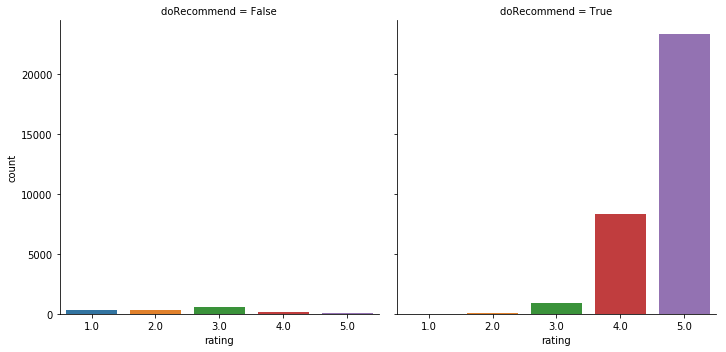

In [8]:
sns.catplot(x= 'rating', col= 'doRecommend', data= sentiment_df, kind= 'count')

In [9]:
sentiment_df[sentiment_df['doRecommend']== False]['rating'].value_counts()

3.0    532
1.0    331
2.0    324
4.0    134
5.0     63
Name: rating, dtype: int64

**Interesting!** Looks like some people rate a product highly but do not recommend it.<br>
Let's peek at the reviews that these products have been given.

In [10]:
pd.set_option('display.max_colwidth', -1)
sentiment_df[(sentiment_df['doRecommend']== False) & (sentiment_df['rating']== 5.0)][['doRecommend', 'rating', 'text']].head(10)

,doRecommend,rating,text
344,False,5.0,"I purchased this on Black Friday because I could pass on the price. The tablet works great for basic internet needs and great for shopping on Amazon. If I were to purchase another Android Tablet, I will look for something with a little more power since this tablet slows when multi-tasking."
1324,False,5.0,I pulled the trigger on the fire tablet knowing the I would have to install the google play store separately. with some work this could be the most bang for your buck for an android tablet.
1646,False,5.0,Great beginner tablet for all ages. Easy to use by all ages.
2682,False,5.0,I bought this tablet for my 13 yr. old God-child and she loves it. This was her Christmas present.
3568,False,5.0,This make an excellent ebook reader. Don't expect much from this device except to read basic ebooks. The good thing is it's cheap and good to read in the sun.
3878,False,5.0,"this is a good one, easy to read and browsethis is a good one, easy to read and browse"
5283,False,5.0,This tablet I can read all the letters and words on so it is pretty good. I hate the ads on the lock screen the goverment doesnt need to know when I READ MY DIGITAL BOOKS>
6406,False,5.0,I have bought 8 of these. They are perfect for kids
7092,False,5.0,"It was easy to use, very nice picture and the quality is out standing, it is a little hard to hold but if you put it on the table it is a lot easier to use I would like to buy another one some day maybe upgrade to a different kind but overall it is worth the money that you pay for it"
7224,False,5.0,We bought it last year Black Friday for us and now we bought it as a gift because it's good for kids


So, taking a look at just 10 of these and you can tell that these seem like false flags. It seems that the reviews are indeed positive, so they match the ratings **BUT** the recommendation does not match that. <br>
Now, let's look at the products recommended and their split by ratings.

In [11]:
sentiment_df[sentiment_df['doRecommend']== True]['rating'].value_counts()

5.0    23326
4.0    8335 
3.0    938  
2.0    58   
1.0    25   
Name: rating, dtype: int64

And now the text for these recommended products with bad ratings.

In [12]:
pd.set_option('display.max_colwidth', -1)
sentiment_df[(sentiment_df['doRecommend']== True) & (sentiment_df['rating']== 1.0)][['doRecommend', 'rating', 'text']].head(10)

,doRecommend,rating,text
633,True,1.0,We bought this earlier on line from another vendor and it was never delivered. Best Buy was great.
4927,True,1.0,I got 6 of them they didn't have google plus me no like
5031,True,1.0,I love using it to read and surf the internet. It is also very handy.
5044,True,1.0,"I totally love the Kindle Fire tablets purchased for my grandkids. My sister purchased one in our hometown for my mother. She is equally happy. My granddaughter and grandson spend their wind down time in the evening on the tablets playing their favorite games. In addition, they want a dog and conduct research for the type of dog that the would like. Overall, the tablets are easy to use and provides technology for them when they visit every other weekend. I am pleased."
5555,True,1.0,i have bought at least 6 people this kindle it is perfect......
7637,True,1.0,Tablet was working perfectly. Now the charging port isn't working. Can't charge the tablet. Will be sending back.
8068,True,1.0,Great easy to use great pictures great price. Awesome
8579,True,1.0,I have yet to use it as I do not know how. I need help!
8949,True,1.0,I bought this to use with a particular app but wasn't able to install them so I returned the tablets.
9034,True,1.0,I bought this tablet on black Friday and went home to test it out and it was very slow and not worth the money


Well, this makes things a bit confusing. The texts here either dont match the *doRecommend* or they do not match the *rating*. <br>
So, going just by this observation, it makes sense to use the *ratings* as a target variable instead of the *doRecommend* variable, since we would probably have a huge number of contradictory reviews. There will be a bunch of false flags, just like in the reviews above, but that is something we cannot really do anything about, unless I read through each one of the 34000 reviews and label them myself...

## Stemming <br>
In Natural language writing, a word is written is several forms due to grammatical purposes. For example, the sentence- I am going to school can be written as I had gone to the school or I have been going to the school depending on the context. For processing in models, it makes sense to convert these types of sentences into a single format. This is where **stemming** and **lemmatization** come in. <br>
Stemming and lemmatization is used to reduce a word to its root form or a common base form. So, *am*, *are*, *is* converts to *be*; *going*, *gone* converts to go and so on. The difference between stemming and lemmatization is the output of this conversion. Lemmatization reduces a word to its equivalent dictionary word, which might actually not be the case with stemming. *Amuse* stems to *amus* whereas its lemma is *amuse*.

In this part, I check two types of stemming methods that are available- Porter and Snowball. So, passed a review to the functions created to generate stemmed equivalents and see the results.
    According to the outputs, the Snowball stemming seems to generate more readable output, while also cleaning up the texts( lower-case and removing special characters). So, I use the Snowball stemming for further use.

In [13]:
from nltk import SnowballStemmer
from nltk import PorterStemmer
from nltk import sent_tokenize, word_tokenize

stopwords = nltk.corpus.stopwords.words('english')

ss = SnowballStemmer('english')
ps= PorterStemmer()

def sentencePorterStem(sentence):
    token_words= word_tokenize(sentence)
    stem_sentence=[]
    for word in token_words:
        if word not in stopwords:
            stem_sentence.append(ps.stem(word))
            stem_sentence.append(' ')
    return ''.join(stem_sentence) 

def sentenceSnowballStem(sentence):
    token_words= word_tokenize(sentence)
    stem_sentence=[]
    for word in token_words:
        if word not in stopwords:
            stem_sentence.append(ss.stem(word))
            stem_sentence.append(' ')
    return ''.join(stem_sentence)

sen= str(sentiment_df['text'][3])

ps_sen= sentencePorterStem(sen)
ss_sen= sentenceSnowballStem(sen)
print(sen)
print('Porter Stem- '+ ps_sen)
print('Snowball Stem- '+ ss_sen)

I've had my Fire HD 8 two weeks now and I love it. This tablet is a great value.We are Prime Members and that is where this tablet SHINES. I love being able to easily access all of the Prime content as well as movies you can download and watch laterThis has a 1280/800 screen which has some really nice look to it its nice and crisp and very bright infact it is brighter then the ipad pro costing $900 base model. The build on this fire is INSANELY AWESOME running at only 7.7mm thick and the smooth glossy feel on the back it is really amazing to hold its like the futuristic tab in ur hands.
Porter Stem- I 've fire HD 8 two week I love . thi tablet great value.w prime member tablet shine . I love abl easili access prime content well movi download watch laterthi 1280/800 screen realli nice look nice crisp bright infact brighter ipad pro cost $ 900 base model . the build fire insan awesom run 7.7mm thick smooth glossi feel back realli amaz hold like futurist tab ur hand . 
Snowball Stem- i ve

In [14]:
sentiment_df['text_stem']= sentiment_df['text'].apply(sentenceSnowballStem)

C:\Users\saumy\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


## Vectorization <br>

Now, with the stemmed reviews, it is required to create vectorized versions of the text. Vectorization is the process of converting sentences into vector or array of numbers. <br>
There are two methods we can go with, count vectorization and TF-IDF vectorization.
-  **Count Vectorization** <br>
In the simplest of terms, it is creating an array whose values are the number of occurences of a word in a sentence. Consider the two sentences- I am a human and I enjoy doing human things (two very human-like sentences). <br>
After stemming both sentences to a very minimal level, if I were to count the number of occurences of each word in the first sentence, I get something like this- <br>
I- 1, be- 1, a- 1, human- 1.<br>
Now, for the next sentence-<br>
I-1, enjoy- 1, be- 1, human-1, things-1.<br>
Now, creating a list of all words in two sentences- {I, be, enjoy, a, human, things}. <br>
Creating an array where the words are the columns and the sentences are the rows, we get something like this-<br>

array([[1, 1, 0, 0, 1, 0],<br>
&emsp;&emsp;&emsp;[1, 1, 1, 0, 1, 1] ]
       
This is the count vectorizer equivalent of the two sentences.

-  **TF-IDF Vectorization** <br>
It is a combination of two concepts- TF (Term Frequency) and IDF (Inverse Document Frequency). <br> 
Term frequency is as the name suggests, the frequency of a word occuring in that document. So, it is the ratio of the number of occurences of the word in the document by the total number of words in the document.<br>
Inverse document frequency is the log base 10 of the ratio of number of documents by the number of documents that the word appears in. The idea behind this is to find words that are more important compared to others.<br> 
<img src="images/IDF-Formula.png" alt="IDF formula" title="IDF formula" /> <br>
So, if a word occurs in all the documents, it is not really an important word.<br>
In this part, I generate the TF-IDF version of the whole review dataset to understand the method and see the output that is generated by it. 
Since TF-IDF and Count vectorization both use similar concepts and generate similar output format, I decided to check the TF-IDF version.

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

sbstem_vectorizer= TfidfVectorizer()
textfeatures= sbstem_vectorizer.fit_transform(sentiment_df['text_stem'])

Check list of feature names generated by the version. The vocabulary dictionary has the terms which are mapped to the feature indices.

In [16]:
from itertools import islice

def take(n, iterable):
    "Return first n items of the iterable as a list"
    return list(islice(iterable, n))

print(take(20, sbstem_vectorizer.vocabulary_.items()))

[('this', 9219), ('product', 7190), ('far', 3472), ('disappoint', 2754), ('my', 6081), ('children', 1928), ('love', 5589), ('use', 9771), ('like', 5457), ('abil', 406), ('monitor', 5968), ('control', 2258), ('content', 2242), ('see', 8037), ('eas', 3035), ('great', 4194), ('beginn', 1270), ('experienc', 3377), ('person', 6797), ('bought', 1505)]


In [17]:
pd.DataFrame(textfeatures.toarray()).head(15)

,0,1,2,3,4,5,6,7,8,9,...,10402,10403,10404,10405,10406,10407,10408,10409,10410,10411
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Change the dataframe column names to the terms to make sense of the dataframe. 

In [18]:
text_vect_df= pd.DataFrame(textfeatures.toarray(), columns= sbstem_vectorizer.vocabulary_)
text_vect_df.head(15)
#text_vect_df['product'].unique()

,this,product,far,disappoint,my,children,love,use,like,abil,...,mk,cables,adjac,chargerit,failerd,subsequ,sprint,htc,anth,greedi
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Basic sentiment analysis using NLTK.<br>
Using 3 sentences of my own, I use NLTK library to identify which sentence are positive, negative or neutral. This can be done by the 'compound' value in the polarity score.

In [19]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

pos_sen= 'I am very happy. I absolutely love it. Great job!'
print('positive - '+ str(sia.polarity_scores(pos_sen)))

neg_sen= 'It is so disgusting. I am very angry. I will murder him.'
print('negative - '+ str(sia.polarity_scores(neg_sen)))

neutral_sen= 'I am writing python in jupyter notebook.'
print('negative - '+ str(sia.polarity_scores(neutral_sen)))

positive - {'neg': 0.0, 'neu': 0.272, 'pos': 0.728, 'compound': 0.9372}
negative - {'neg': 0.649, 'neu': 0.351, 'pos': 0.0, 'compound': -0.9316}
negative - {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


C:\Users\saumy\Anaconda3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [20]:
dataset=sentiment_df[['text_stem', 'rating']]
                     
dataset['rating'] = dataset['rating'].apply(lambda x:'Positive' if x>=4 else 'Negative')

def SentimentCoeff(sentence):
    score = sia.polarity_scores(sentence)
    return score['compound']

dataset['sentiment_coeff']= dataset['text_stem'].apply(SentimentCoeff)
dataset.head()

C:\Users\saumy\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\saumy\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,text_stem,rating,sentiment_coeff
0,this product far disappoint . my children love use i like abil monitor control content see eas .,Positive,0.6124
1,great beginn experienc person . bought gift love,Positive,0.9042
2,"inexpens tablet use learn , step nabi . he thrill , learn skype alreadi ...",Positive,0.3612
3,i ve fire hd 8 two week i love . this tablet great value.w prime member tablet shine . i love abl easili access prime content well movi download watch laterthi 1280/800 screen realli nice look nice crisp bright infact brighter ipad pro cost $ 900 base model . the build fire insan awesom run 7.7mm thick smooth glossi feel back realli amaz hold like futurist tab ur hand .,Positive,0.9790
4,"i bought grand daughter come visit . i set user , enter age name amazon make sure access site content appropri age . simpl love capabl . i also bought instal 64gig sd card give littl tablet plenti storag . for price i think tablet best one . you spend hundr dollar addit speed capac come basic tablet everyth peopl ever need fraction cost .",Positive,0.9371


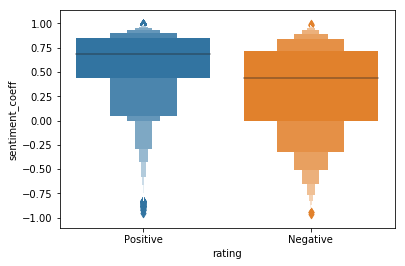

In [21]:
sns.boxenplot(x= 'rating', y= 'sentiment_coeff', data= dataset)

So, after using the sentiment analyzer available in NLTK, the positive review seems more logical- higher sentiment coefficient for these reviews, whereas the sentiment coefficient seems more neutral for negative reviews. But, there is also the way categorization of these reviews is done may shed some light here. Reviews with 3 or 2 stars are now negative reviews, whereas the actual review might not be that negative. 

### Preparing for model <br>
Let's start with the data preparation for creating a logistic regression model. We will start by splitting the whole data into 2 parts for training and testing with 70-30 split. 

In [22]:
x= dataset['text_stem']
y= dataset['rating']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

Using TF-IDF and Count vector formats as inputs to the Logistic regression model to check which version provides better output, along with finding the optimal parameters using GridSearchCV.

In [23]:
tfidf_vectorizer= TfidfVectorizer()
x_train_features_tfidf= tfidf_vectorizer.fit_transform(x_train)
x_test_features_tfidf= tfidf_vectorizer.transform(x_test)

count_vectorizer= CountVectorizer()
x_train_features_count= count_vectorizer.fit_transform(x_train)
x_test_features_count= count_vectorizer.transform(x_test)

In [24]:
logreg_params={'penalty': ['l1', 'l2'], 'C': [0.01, 0.1, 1, 10, 100]}

grid_logreg= GridSearchCV(LogisticRegression(solver= 'liblinear'), logreg_params, cv=5)
grid_logreg.fit(x_train_features_count, y_train)

logreg= grid_logreg.best_estimator_

print('Best Penalty:', grid_logreg.best_estimator_.get_params()['penalty'])
print('Best C:', grid_logreg.best_estimator_.get_params()['C'])

c_value= grid_logreg.best_estimator_.get_params()['C']
pen_value= grid_logreg.best_estimator_.get_params()['penalty']

C:\Users\saumy\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\saumy\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\saumy\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Best Penalty: l2
Best C: 0.1


In [25]:
logreg=LogisticRegression(C= c_value, penalty= pen_value, solver= 'liblinear')
logreg.fit(x_train_features_count, y_train)
y_pred= logreg.predict(x_test_features_count)

### F1 score and Confusion Matrix <br>

In two-class classification algorithms, model evaluation is done by calculating metrics such as precision, recall and F1 score.
Starting with the basics, in a two- class supervised classification algorithm, the data can be categorized in either the correct class or the incorrect class. If it is classified in the incorrect class, it would lead to an error. Depending upon the targeted and predicted class, it can be classified as a **Type-I error** or a **Type-II error**. <br>
<img src="images/Precisionrecall.png" alt="PR" title="Precision- Recall basics" /> <br>
The diagram gives a pretty good picture of the classification metrics. Type-I error is also known as False Positive, while Type-II error is also known as False Negative.<br>
*Precision* is ratio of True Positive and actual results- that is True Positive and False Positive, while *Recall* is ratio of True Positive and predicted results- that is True Positive and False Negative. *Accuracy* is the average of True Positive and True Negative.<br>
F1 Score is the harmonic mean of Precision and Recall. It calculates in such a way that both the metrics are given equal weightage, so there is no need to sacrifice one metric over the other.<br>
Confusion matrix is a plot similar to the diagram above, with the counts in each predicted category.

In [26]:
print('Recall Score: {:.2f}'.format(recall_score(y_test, y_pred, pos_label= 'Positive')))
print('Precision Score: {:.2f}'.format(precision_score(y_test, y_pred, pos_label= 'Positive')))
print('F1 Score: {:.2f}'.format(f1_score(y_test, y_pred, pos_label= 'Positive')))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_test, y_pred)))

Recall Score: 0.99
Precision Score: 0.94
F1 Score: 0.97
Accuracy Score: 0.94


Plotting confusion matrix of the predicted and actual values.

Text(0.5,15,'Predicted label')

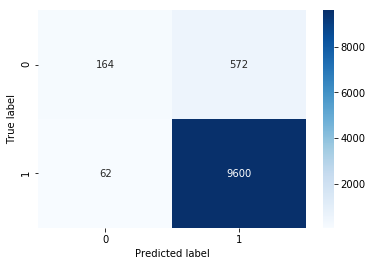

In [27]:
cnf_matrix = confusion_matrix(y_test, y_pred)

df_cnf_matrix= pd.DataFrame(cnf_matrix)
sns.heatmap(df_cnf_matrix, annot=True, fmt='g', cmap="Blues")
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [28]:
logreg_params={'penalty': ['l1', 'l2'], 'C': [0.01, 0.1, 1, 10, 100]}

#Added solver saga to repress warnings- saga recommended by sklearn
grid_logreg= GridSearchCV(LogisticRegression(solver= 'liblinear'), logreg_params, cv=5)
grid_logreg.fit(x_train_features_tfidf, y_train)

logreg= grid_logreg.best_estimator_

print('Best Penalty:', grid_logreg.best_estimator_.get_params()['penalty'])
print('Best C:', grid_logreg.best_estimator_.get_params()['C'])

c_value_tf= grid_logreg.best_estimator_.get_params()['C']
pen_value_tf= grid_logreg.best_estimator_.get_params()['penalty']

Best Penalty: l1
Best C: 1


In [29]:
logreg_tf=LogisticRegression(C= c_value_tf, penalty= pen_value_tf, solver= 'liblinear')
logreg_tf.fit(x_train_features_tfidf, y_train)
y_pred_tf= logreg_tf.predict(x_test_features_tfidf)

In [30]:
print('Recall Score: {:.2f}'.format(recall_score(y_test, y_pred_tf, pos_label= 'Positive')))
print('Precision Score: {:.2f}'.format(precision_score(y_test, y_pred_tf, pos_label= 'Positive')))
print('F1 Score: {:.2f}'.format(f1_score(y_test, y_pred_tf, pos_label= 'Positive')))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_test, y_pred_tf)))

Recall Score: 0.99
Precision Score: 0.94
F1 Score: 0.97
Accuracy Score: 0.94


Text(0.5,15,'Predicted label')

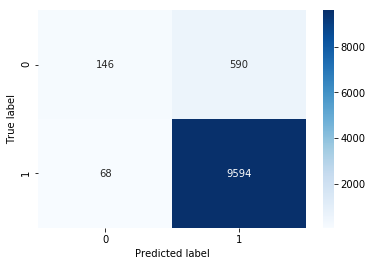

In [31]:
cnf_matrix = confusion_matrix(y_test, y_pred_tf)

df_cnf_matrix= pd.DataFrame(cnf_matrix)
sns.heatmap(df_cnf_matrix, annot=True, fmt='g', cmap="Blues")
plt.ylabel('True label')
plt.xlabel('Predicted label')

Overall, it seems that the two versions generate similar results. The F1 scores are the same and they have similar scores for the rest of the parameters. So, for this dataset any vectorization of the text would work well.

## Final Words<br>
So, we walked through various parts of a data science projects- data cleaning, exploration, data visualization, data manipulation for creating a model. We also looked at various techniques used for text analytics- vectorization and sentiment analysis.<br>
Looking back, I would like to explore this dataset more using similar machine learning techniques, especially in the model part. There are several other classification algorithms such as Random Forest and Naive Bayes which I would like to read upon and possibly implement with the dataset to compare the different algorithms. There is also a possibility of including neural network systems which can be checked upon as well.<br>